# Model 4: Visualization

In [1]:
import matplotlib.pyplot as plt 
import numpy as np              
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense,Conv2D,Flatten,MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau
from tensorflow.keras.utils import plot_model
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import classification_report,confusion_matrix
import seaborn as sns         

from google.colab import drive

drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


## Importing Pneumonia dataset

In [2]:
batch_size = 16
train_dir = '/content/drive/MyDrive/D7047E_project/chest_xray/train'
test_dir =  '/content/drive/MyDrive/D7047E_project/chest_xray/test'
val_dir =  '/content/drive/MyDrive/D7047E_project/chest_xray/val'


img_height = 500
img_width = 500

image_gen = ImageDataGenerator(rescale = 1./255,
                              shear_range = 0.2,
                              zoom_range = 0.2,
                              horizontal_flip = True,          
                              )

test_data_gen = ImageDataGenerator(rescale = 1./255)

In [3]:
train = image_gen.flow_from_directory(
      train_dir,
      target_size=(img_height, img_width),
      color_mode='grayscale',
      class_mode='binary',
      batch_size=batch_size
      )
test = test_data_gen.flow_from_directory(
      test_dir,
      target_size=(img_height, img_width),
      color_mode='grayscale',
      shuffle=False,
      class_mode='binary',
      batch_size=batch_size
      )
valid = test_data_gen.flow_from_directory(
      val_dir,
      target_size=(img_height, img_width),
      color_mode='grayscale',
      class_mode='binary', 
      batch_size=batch_size
      )


Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


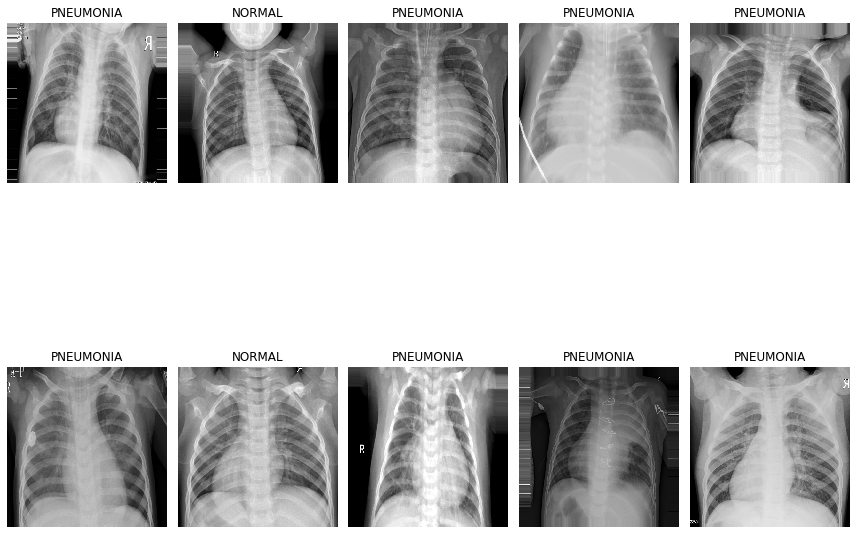

In [4]:
plt.figure(figsize=(12, 12))
for i in range(0, 10):
    plt.subplot(2, 5, i+1)
    for X_batch, Y_batch in train:
        image = X_batch[0]        
        dic = {0:"NORMAL", 1:"PNEUMONIA"}
        plt.title(dic.get(Y_batch[0]))
        plt.axis("off")
        plt.imshow(np.squeeze(image),cmap="gray",interpolation="nearest")
        break
plt.tight_layout()
plt.show()

## Model 4

### The convolutional layers of Model 4

In [ ]:
cnn_before = Sequential()
cnn_before.add(Conv2D(32, (3, 3), activation="relu", input_shape=(img_width, img_height, 1)))
cnn_before.add(MaxPooling2D(pool_size = (2, 2)))
cnn_before.add(Conv2D(32, (3, 3), activation="relu", input_shape=(img_width, img_height, 1)))
cnn_before.add(MaxPooling2D(pool_size = (2, 2)))
cnn_before.add(Conv2D(32, (3, 3), activation="relu", input_shape=(img_width, img_height, 1)))
cnn_before.add(MaxPooling2D(pool_size = (2, 2)))
cnn_before.add(Conv2D(64, (3, 3), activation="relu", input_shape=(img_width, img_height, 1)))
cnn_before.add(MaxPooling2D(pool_size = (2, 2)))
cnn_before.add(Conv2D(64, (3, 3), activation="relu", input_shape=(img_width, img_height, 1)))
cnn_before.add(MaxPooling2D(pool_size = (2, 2)))
cnn_before.add(Flatten())
# cnn_before.add(Dense(activation = 'relu', units = 128))
# cnn_before.add(Dense(activation = 'relu', units = 64))
# cnn_before.add(Dense(activation = 'sigmoid', units = 1))
cnn_before.compile(optimizer = 'Adam', loss = 'mean_squared_error', metrics = ['accuracy'])

cnn_before.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 498, 498, 32)      320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 249, 249, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 247, 247, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 123, 123, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 121, 121, 32)      9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 60, 60, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 58, 58, 64)        1

#### Extracting features from convolutional layers before training

In [ ]:
# Extract features from CNN layers before training
features_before = cnn_before.predict(x=train, verbose=1)

326/326 [==============================] - 1868s 6s/step


#### Training Model 5 with fully connected layers for 50 epoches.

In [ ]:
# Initialize model with fully connected layer
cnn = Sequential()
cnn.add(Conv2D(32, (3, 3), activation="relu", input_shape=(img_width, img_height, 1)))
cnn.add(MaxPooling2D(pool_size = (2, 2)))
cnn.add(Conv2D(32, (3, 3), activation="relu", input_shape=(img_width, img_height, 1)))
cnn.add(MaxPooling2D(pool_size = (2, 2)))
cnn.add(Conv2D(32, (3, 3), activation="relu", input_shape=(img_width, img_height, 1)))
cnn.add(MaxPooling2D(pool_size = (2, 2)))
cnn.add(Conv2D(64, (3, 3), activation="relu", input_shape=(img_width, img_height, 1)))
cnn.add(MaxPooling2D(pool_size = (2, 2)))
cnn.add(Conv2D(64, (3, 3), activation="relu", input_shape=(img_width, img_height, 1)))
cnn.add(MaxPooling2D(pool_size = (2, 2)))

cnn.add(Flatten())

cnn.add(Dense(activation = 'relu', units = 128))
cnn.add(Dense(activation = 'relu', units = 64))
cnn.add(Dense(activation = 'sigmoid', units = 1))

cnn.compile(optimizer = 'Adam', loss = 'mean_squared_error', metrics = ['accuracy'])

cnn.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 498, 498, 32)      320       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 249, 249, 32)      0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 247, 247, 32)      9248      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 123, 123, 32)      0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 121, 121, 32)      9248      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 60, 60, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 58, 58, 64)       

In [ ]:
# Set training parameters
early = EarlyStopping(monitor='val_loss', mode='min', patience=3)
learning_rate_reduction = ReduceLROnPlateau(monitor="val_loss", patience = 2, verbose=1,factor=0.3, min_lr=0.000001)
callbacks_list = [ early, learning_rate_reduction]

# randomly initialize weights
weights = compute_class_weight('balanced', np.unique(train.classes), train.classes)
cw = dict(zip( np.unique(train.classes), weights))

# Train Model4 for 25 epoches
history = cnn.fit(train,epochs=25, validation_data=valid, class_weight=cw, callbacks=callbacks_list)

Epoch 1/25
326/326 [==============================] - 131s 398ms/step - loss: 0.1618 - accuracy: 0.6774 - val_loss: 0.2127 - val_accuracy: 0.6875
Epoch 2/25
326/326 [==============================] - 122s 374ms/step - loss: 0.0649 - accuracy: 0.9143 - val_loss: 0.3008 - val_accuracy: 0.6875
Epoch 3/25
326/326 [==============================] - 122s 374ms/step - loss: 0.0580 - accuracy: 0.9241 - val_loss: 0.2965 - val_accuracy: 0.5625

Epoch 00003: ReduceLROnPlateau reducing learning rate to 0.0003000000142492354.
Epoch 4/25
326/326 [==============================] - 122s 374ms/step - loss: 0.0463 - accuracy: 0.9339 - val_loss: 0.2112 - val_accuracy: 0.6875
Epoch 5/25
326/326 [==============================] - 122s 375ms/step - loss: 0.0467 - accuracy: 0.9358 - val_loss: 0.2194 - val_accuracy: 0.6875
Epoch 6/25
326/326 [==============================] - 123s 376ms/step - loss: 0.0446 - accuracy: 0.9393 - val_loss: 0.2061 - val_accuracy: 0.6875
Epoch 7/25
326/326 [=======================

#### Evaluate trained model

In [ ]:
cnn.evaluate(x=test, batch_size=batch_size, verbose=1)

39/39 [==============================] - 167s 4s/step - loss: 0.0727 - accuracy: 0.9135


[0.07268726080656052, 0.9134615659713745]

#### Extracting features from the convolutional layers for trained Model 5.

In [ ]:
extractor = Model(inputs=cnn.input, outputs=cnn.get_layer(index=10).output)
extractor.trainable = False
extractor.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10_input (InputLayer) [(None, 500, 500, 1)]     0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 498, 498, 32)      320       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 249, 249, 32)      0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 247, 247, 32)      9248      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 123, 123, 32)      0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 121, 121, 32)      9248      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 60, 60, 32)        0     

In [ ]:
features_after = extractor.predict(x=train, verbose=1)

326/326 [==============================] - 117s 358ms/step


## Visualizing features with PCA and t-SNE


In [ ]:
from time import time
from sklearn.decomposition import PCA
from sklearn import manifold

def compute_projections(x):
  print('Computing PCA projection')
  pca = PCA(n_components=2).fit(x).transform(x)
  print('done!\n')

  print('Computing t-SNE projection')
  tsne = manifold.TSNE(n_components=2, init='pca', random_state=0)
  t0 = time()
  tsne = tsne.fit_transform(x)
  print('don!\n')

  return pca, tsne

def plot_projection(X, title=None):
  plt.figure(figsize=(15,15))
  lw = 2

  for i in np.unique(train.labels):
      plt.scatter(X[train.labels == i, 0], X[train.labels == i, 1], alpha=.8, lw=lw,
                  label=np.unique(train.labels)[i])
  plt.legend(loc='best', shadow=False, scatterpoints=1)
  if title is not None:
    plt.title(title)
  plt.show()

In [ ]:
pca, X_tsne = compute_projections(features_before)

Computing PCA projection
done!

Computing t-SNE projection
don!



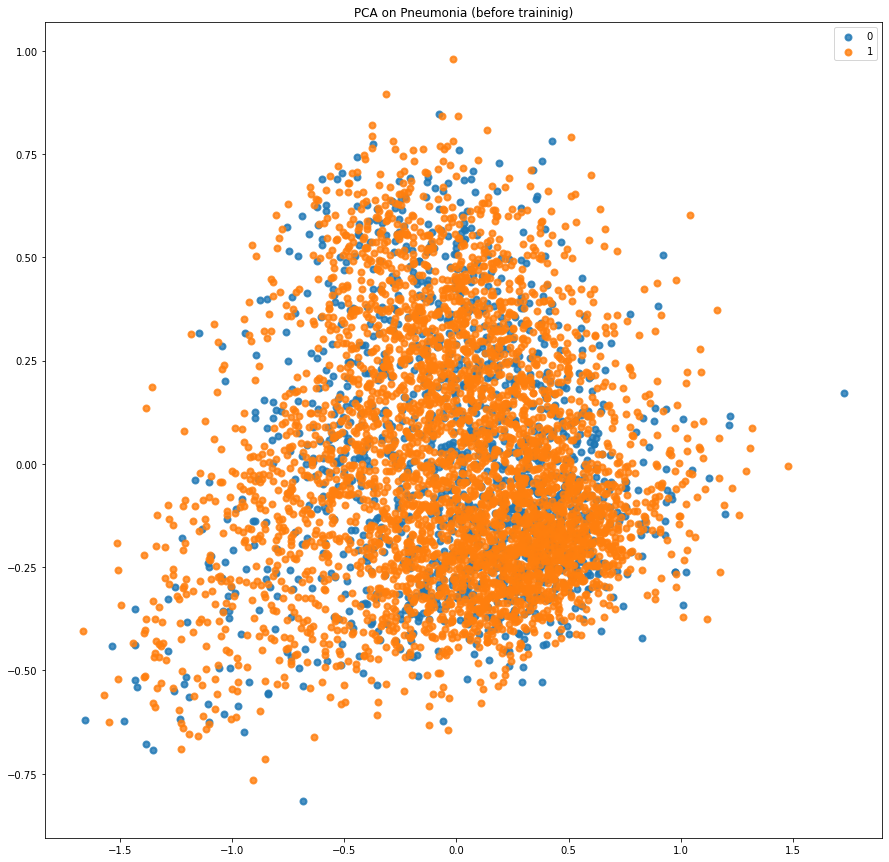

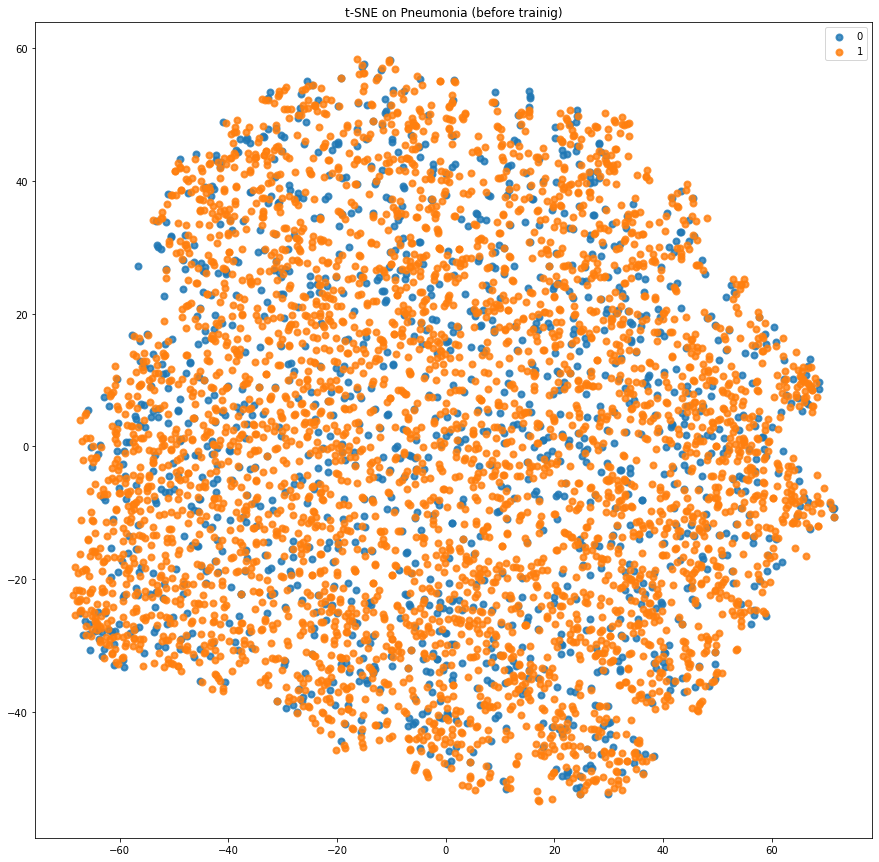

In [ ]:
plot_projection(pca, title='PCA on Pneumonia (before traininig)')
plot_projection(X_tsne, title='t-SNE on Pneumonia (before trainig)')

In [ ]:
pca2, X_tsne2 = compute_projections(features_after)

Computing PCA projection
done!

Computing t-SNE projection
don!



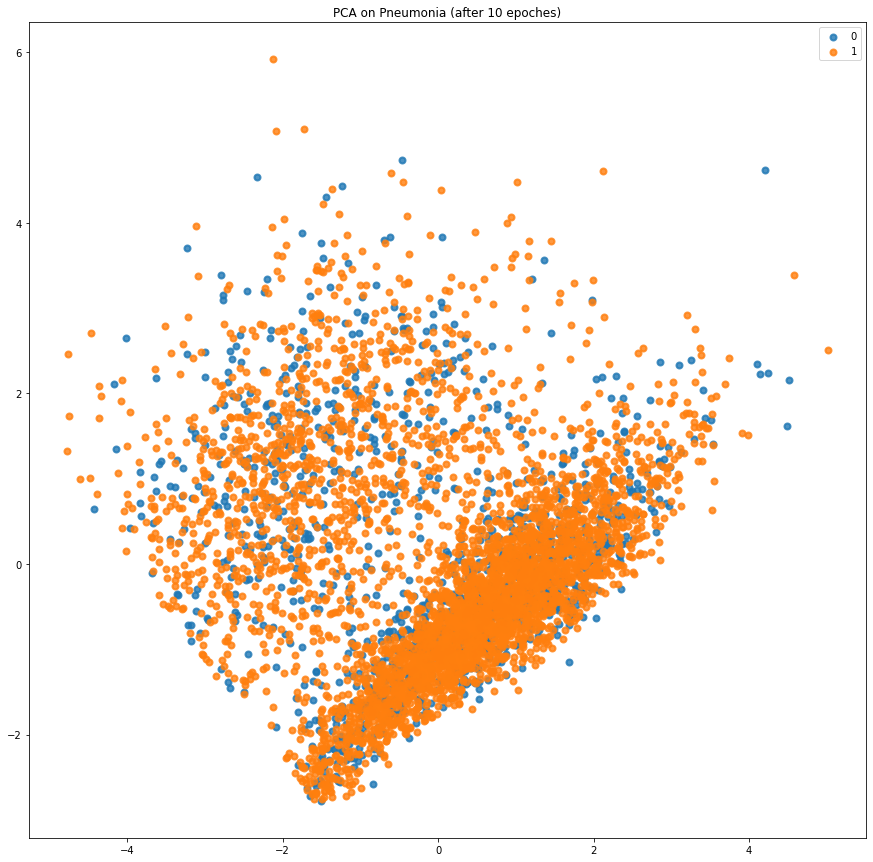

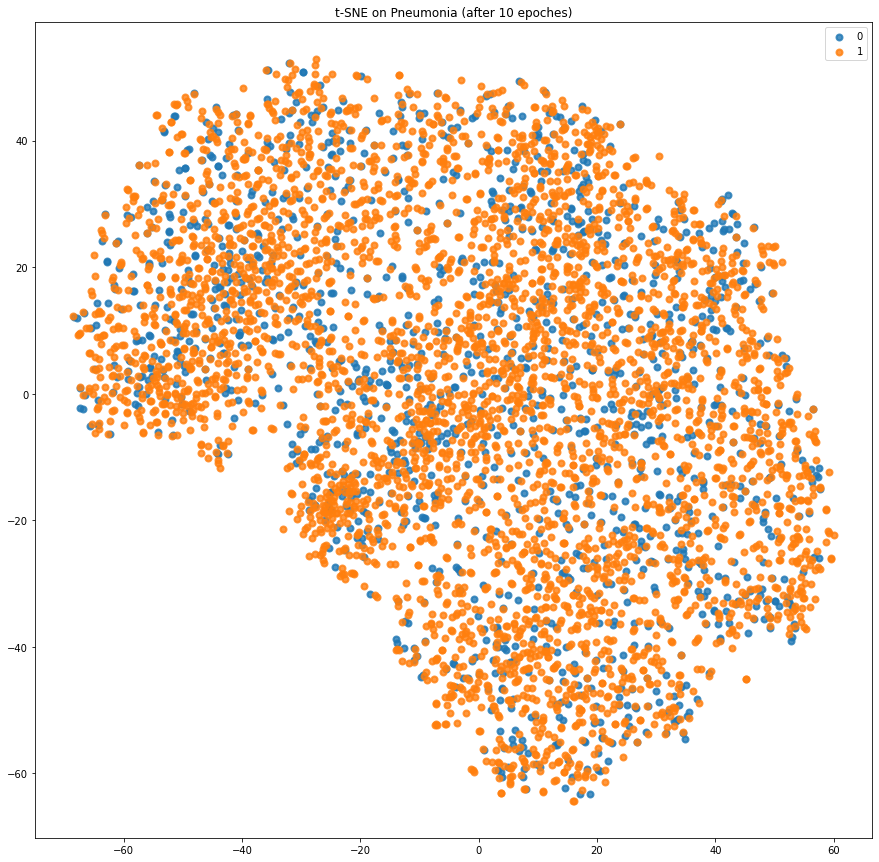

In [ ]:
plot_projection(pca2, title='PCA on Pneumonia (after 10 epoches)')
plot_projection(X_tsne2, title='t-SNE on Pneumonia (after 10 epoches)')

Above plots shows features for partly trained model.

Following plot will show features for fully (50 epochs) trained model.

In [ ]:
# Continue training of the model for another 15 epoches
history2 = cnn.fit(train,epochs=15, validation_data=valid, class_weight=cw)

Epoch 1/15
326/326 [==============================] - 125s 382ms/step - loss: 0.0329 - accuracy: 0.9569 - val_loss: 0.1051 - val_accuracy: 0.9375
Epoch 2/15
326/326 [==============================] - 124s 381ms/step - loss: 0.0326 - accuracy: 0.9540 - val_loss: 0.1407 - val_accuracy: 0.7500
Epoch 3/15
326/326 [==============================] - 123s 377ms/step - loss: 0.0287 - accuracy: 0.9601 - val_loss: 0.2092 - val_accuracy: 0.6875
Epoch 4/15
326/326 [==============================] - 123s 377ms/step - loss: 0.0297 - accuracy: 0.9599 - val_loss: 0.2076 - val_accuracy: 0.6875
Epoch 5/15
326/326 [==============================] - 122s 374ms/step - loss: 0.0301 - accuracy: 0.9609 - val_loss: 0.1797 - val_accuracy: 0.6875
Epoch 6/15
326/326 [==============================] - 122s 374ms/step - loss: 0.0296 - accuracy: 0.9586 - val_loss: 0.1737 - val_accuracy: 0.6875
Epoch 7/15
326/326 [==============================] - 122s 375ms/step - loss: 0.0284 - accuracy: 0.9624 - val_loss: 0.0969 -

In [ ]:
eval2 = cnn.evaluate(x=test, verbose=1)

39/39 [==============================] - 6s 145ms/step - loss: 0.0719 - accuracy: 0.9054


In [ ]:
extractor = Model(inputs=cnn.input, outputs=cnn.get_layer(index=10).output)
extractor.trainable = False
extractor.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10_input (InputLayer) [(None, 500, 500, 1)]     0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 498, 498, 32)      320       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 249, 249, 32)      0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 247, 247, 32)      9248      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 123, 123, 32)      0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 121, 121, 32)      9248      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 60, 60, 32)        0   

In [ ]:
# extract features after 25 epochs
features_after25 = extractor.predict(x=train, verbose=1)

326/326 [==============================] - 117s 360ms/step


In [ ]:
pca3, X_tsne3 = compute_projections(features_after25)

Computing PCA projection
done!

Computing t-SNE projection
don!



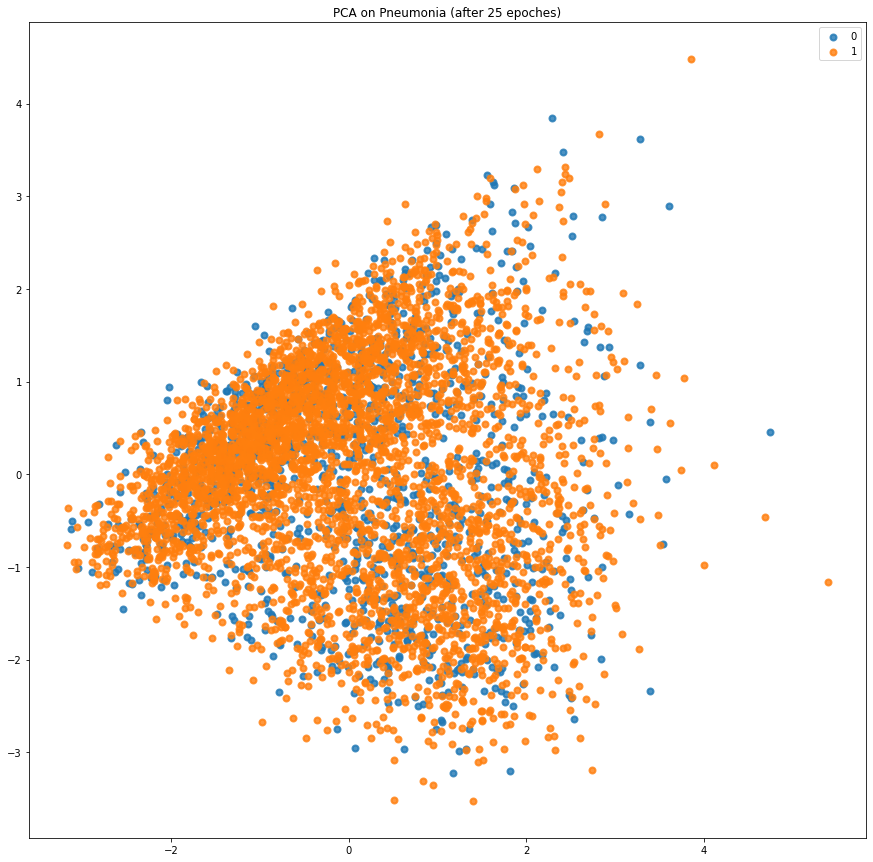

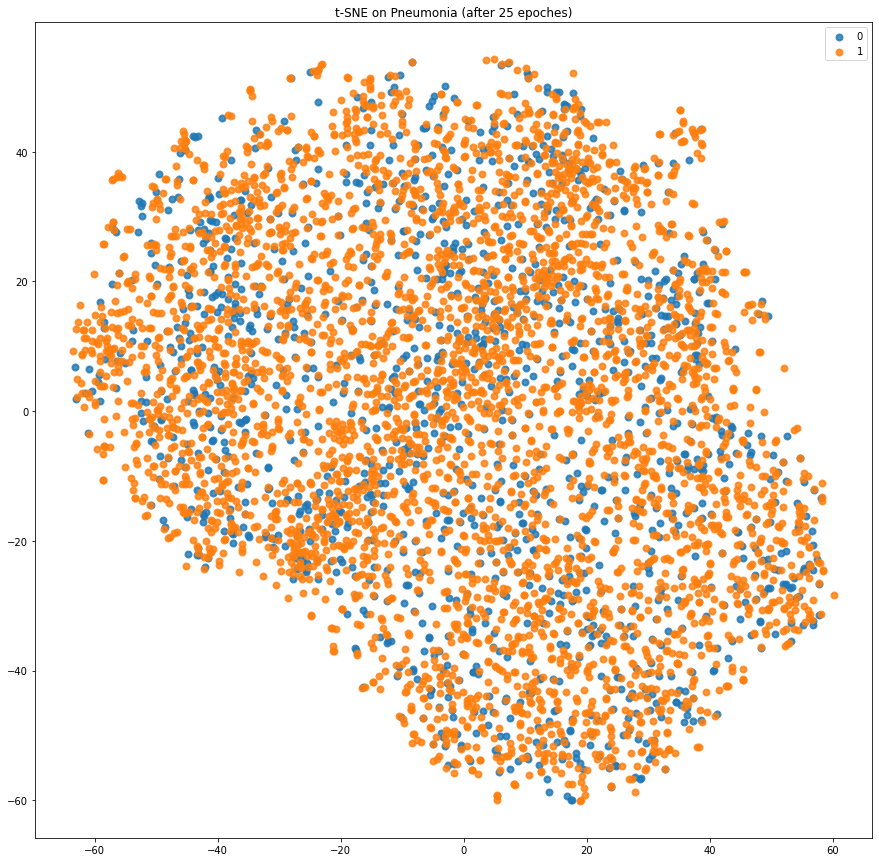

In [ ]:
plot_projection(pca3, title='PCA on Pneumonia (after 25 epoches)')
plot_projection(X_tsne3, title='t-SNE on Pneumonia (after 25 epoches)')

Saving history

In [ ]:
np.save('/content/drive/MyDrive/D7047E_project/visualization/history_10_epochs.npy',history.history)
np.save('/content/drive/MyDrive/D7047E_project/visualization/history_10-25_epoochs.npy',history2.history)

In [ ]:
cnn.save('/content/drive/MyDrive/D7047E_project/visualization/Model4_trained_25_epochs')

## Plotting metrics

In [17]:
# loading history
hist10 = np.load('/content/drive/MyDrive/D7047E_project/visualization/history_10_epochs.npy', allow_pickle=True).item()
hist10_25 = np.load('/content/drive/MyDrive/D7047E_project/visualization/history_10-25_epoochs.npy', allow_pickle=True).item()

In [18]:
hist10.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])

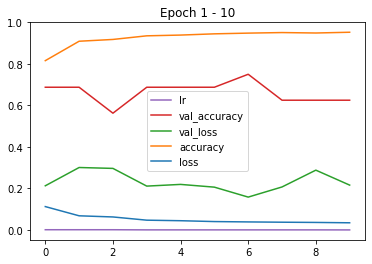

In [28]:
pd.DataFrame(hist10).plot(title='Epoch 1 - 10')

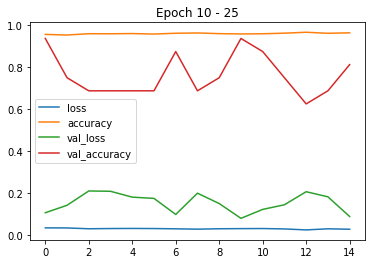

In [25]:
pd.DataFrame(hist10_25).plot(title='Epoch 10 - 25')